<a href="https://colab.research.google.com/github/whysush/lawbot/blob/main/lawbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attempting to fine-tune an LLM Model to answer legal doubts

As the title suggests, this is an attempt to fine-tune a Gemini GenAI Model (base model: Gemini 1.5 Flash 001 Tuning) to help answer legal doubts.

The dataset used is formatted as a list of legal QnA, which the model then uses to answer user questions.

**Note**: This model is not being trained or used as a substitute to actual lawyers. Please rely on professional legal assistance always. The model's responses are to be taken with a grain of salt as it is run on a comparatively small dataset.

Dataset based on the Indian Penal Code and the Constitution of India.

# Model Details
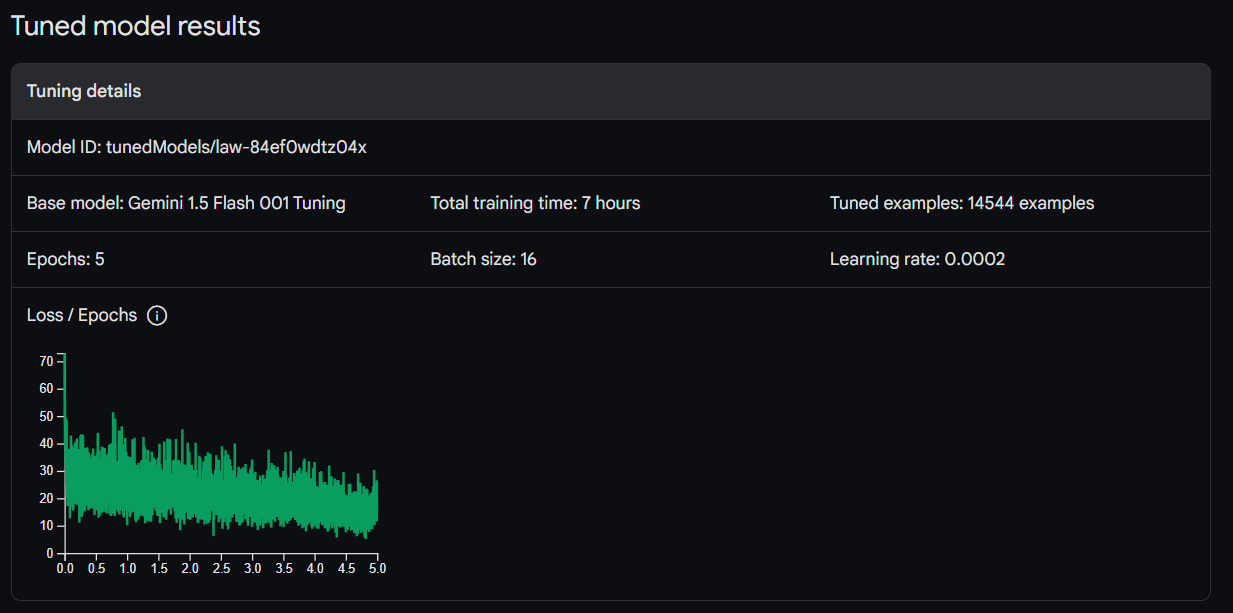

In [1]:
pip install -U google-generativeai

In [17]:
import os
import google.generativeai as genai

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

In [16]:
for model_info in genai.list_tuned_models():
    print(model_info.name)

In [18]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


In [20]:
import ipywidgets as widgets
from IPython.display import display
import google.generativeai as genai

In [22]:
def bot_response(user_input):
    model = genai.GenerativeModel(model_name="tunedModels/law-84ef0wdtz04x")
    result = model.generate_content(user_input)
    return result.text

In [28]:
input_box = widgets.Text(
    description="Ask:",
    placeholder="Type your question here..."
)

output_area = widgets.Output()

def on_submit(sender):
    user_input = input_box.value
    input_box.value = ""
    response = bot_response(user_input)

    with output_area:
        print(f"You: {user_input}")
        print(f"LawBot: {response}\n")

input_box.on_submit(on_submit)

display(input_box, output_area)

Text(value='', description='Ask:', placeholder='Type your question here...')

Output()